In [29]:
#Loading necessary libraries I will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import shap
shap.initjs()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier

In [5]:
#load dataset into variable 'df'
df = pd.read_csv('twenty_mins_data.csv')
df.head()

,Unnamed: 0,total_blue_side_minions,total_blue_side_gold_earned,total_blue_side_wards_placed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_dragons_killed,total_blue_side_riftHeralds_killed,total_towers_destroyed_by_blue,total_inhibitors_destroyed_by_blue,total_red_side_minions,total_red_side_gold_earned,total_red_side_kills,total_red_side_deaths,total_red_side_wards_placed,total_red_side_dragons_killed,total_red_side_riftHeralds_killed,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,blue_side_won
0,0,482,36403,79,15,16,2,0,1,0,537,37878,16,15,38,1,1,3,0,0
1,0,452,45450,41,31,10,2,1,8,0,400,32273,10,31,136,0,0,3,2,1
2,0,467,38334,39,22,12,2,1,1,0,455,35596,12,22,34,0,0,5,0,1
3,0,425,32749,67,12,16,0,1,0,0,466,36281,16,12,47,3,0,3,0,0
4,0,472,36853,47,17,8,2,1,1,0,511,32248,8,17,36,1,0,3,0,0


In [6]:
#drop the column 'unnamed: 0' from the dataset.
df=df.drop(['Unnamed: 0'], axis=1)

In [7]:
#get statistical description of the data
df.describe()

,total_blue_side_minions,total_blue_side_gold_earned,total_blue_side_wards_placed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_dragons_killed,total_blue_side_riftHeralds_killed,total_towers_destroyed_by_blue,total_inhibitors_destroyed_by_blue,total_red_side_minions,total_red_side_gold_earned,total_red_side_kills,total_red_side_deaths,total_red_side_wards_placed,total_red_side_dragons_killed,total_red_side_riftHeralds_killed,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,blue_side_won
count,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000,8743.000000
mean,470.760151,36965.803729,53.066339,16.594418,16.985131,0.881276,0.522818,1.938579,0.020588,476.474208,37158.834039,16.985131,16.594418,55.740249,1.362805,0.385909,3.138282,0.030310,0.468832
std,37.218680,3412.908269,35.117308,5.966273,6.067606,0.848698,0.499508,1.514968,0.167850,36.932974,3410.646115,6.067606,5.966273,38.896352,0.901534,0.486837,1.642556,0.198071,0.499056
min,294.000000,24851.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,323.000000,24931.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,446.000000,34582.000000,38.000000,12.000000,13.000000,0.000000,0.000000,1.000000,0.000000,453.000000,34794.000000,13.000000,12.000000,39.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,472.000000,36803.000000,43.000000,16.000000,16.000000,1.000000,1.000000,2.000000,0.000000,477.000000,36938.000000,16.000000,16.000000,45.000000,1.000000,0.000000,3.000000,0.000000,0.000000
75%,496.000000,39104.500000,53.000000,20.000000,21.000000,1.000000,1.000000,3.000000,0.000000,502.000000,39357.000000,21.000000,20.000000,55.000000,2.000000,1.000000,4.000000,0.000000,1.000000
max,607.000000,51234.000000,478.000000,42.000000,49.000000,3.000000,1.000000,10.000000,3.000000,608.000000,53832.000000,49.000000,42.000000,681.000000,3.000000,1.000000,11.000000,3.000000,1.000000


In [8]:
#get information about the data, e.g. how many values in every column, data type of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8743 entries, 0 to 8742
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   total_blue_side_minions             8743 non-null   int64
 1   total_blue_side_gold_earned         8743 non-null   int64
 2   total_blue_side_wards_placed        8743 non-null   int64
 3   total_blue_side_kills               8743 non-null   int64
 4   total_blue_side_deaths              8743 non-null   int64
 5   total_blue_side_dragons_killed      8743 non-null   int64
 6   total_blue_side_riftHeralds_killed  8743 non-null   int64
 7   total_towers_destroyed_by_blue      8743 non-null   int64
 8   total_inhibitors_destroyed_by_blue  8743 non-null   int64
 9   total_red_side_minions              8743 non-null   int64
 10  total_red_side_gold_earned          8743 non-null   int64
 11  total_red_side_kills                8743 non-null   int64
 12  total_

In [9]:
#get a correlation of every feature/column with our target variable 'blue_side_won'. 1 means blue won, 0 means red won. we see that at 20 minutes, gold earned by blue side
#is the biggest factor that determines their victory. we also see an inverse relationship with red side.
corr = df.corr()
corr['blue_side_won'].sort_values(ascending=False)

blue_side_won                         1.000000
total_blue_side_gold_earned           0.499702
total_towers_destroyed_by_blue        0.431318
total_red_side_deaths                 0.420160
total_blue_side_kills                 0.420160
total_blue_side_dragons_killed        0.356676
total_blue_side_riftHeralds_killed    0.283113
total_blue_side_minions               0.233336
total_inhibitors_destroyed_by_blue    0.116908
total_blue_side_wards_placed          0.018766
total_red_side_wards_placed          -0.000850
total_inhibitors_destroyed_by_red    -0.076655
total_red_side_minions               -0.236448
total_red_side_riftHeralds_killed    -0.285713
total_red_side_dragons_killed        -0.352676
total_towers_destroyed_by_red        -0.372285
total_blue_side_deaths               -0.421588
total_red_side_kills                 -0.421588
total_red_side_gold_earned           -0.495472
Name: blue_side_won, dtype: float64

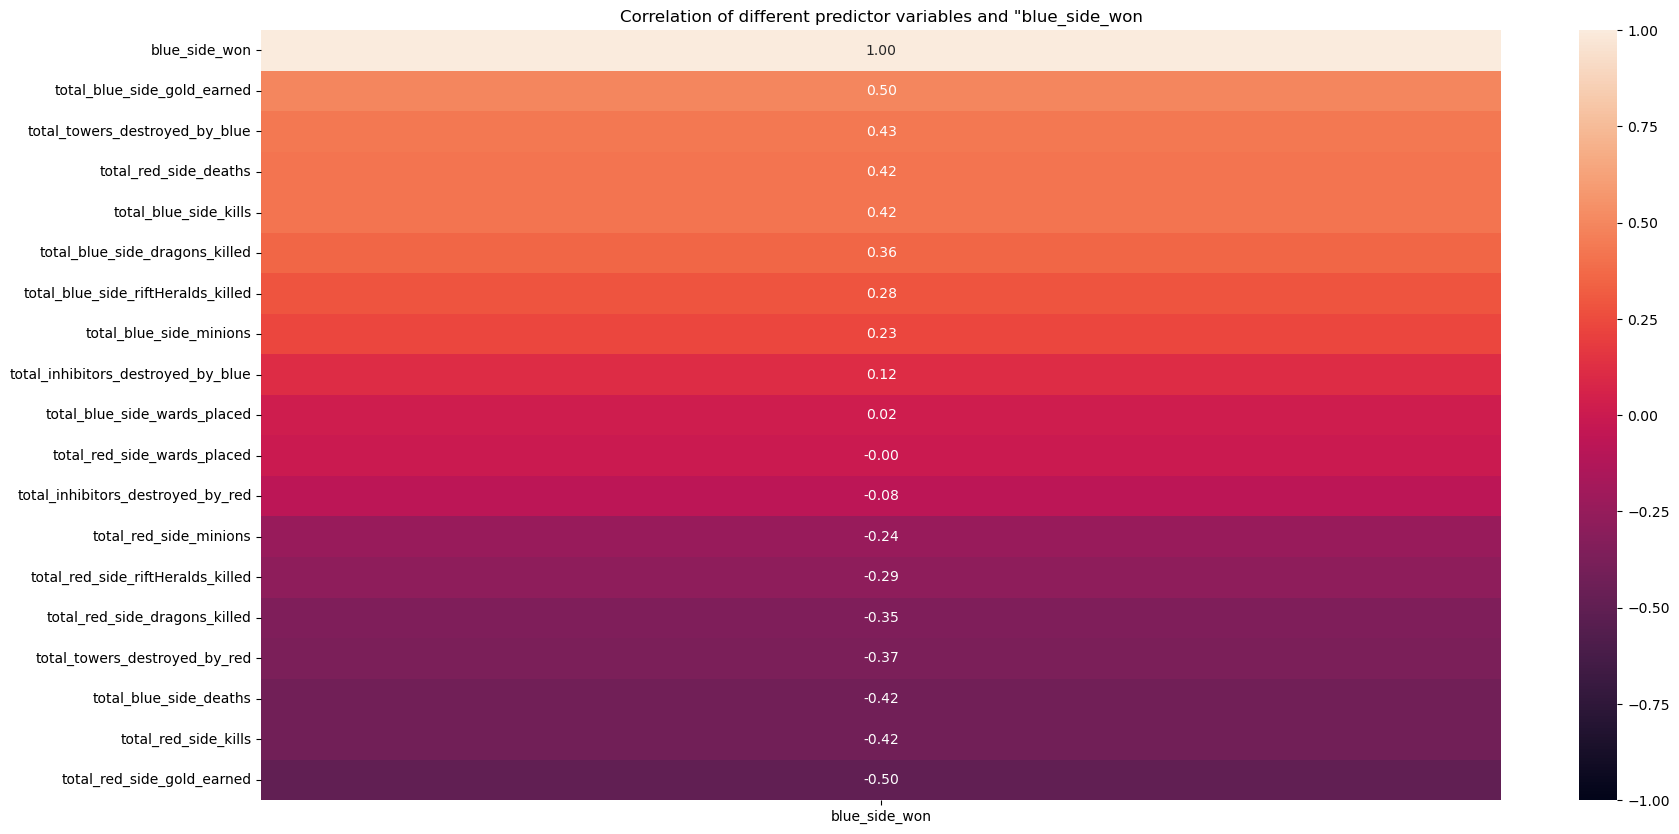

In [10]:
#visualize the correlation from above 
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr()[['blue_side_won']].sort_values(by='blue_side_won',ascending=False)
            ,vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation of different predictor variables and "blue_side_won')
plt.show()

Text(0, 0.5, 'Count')

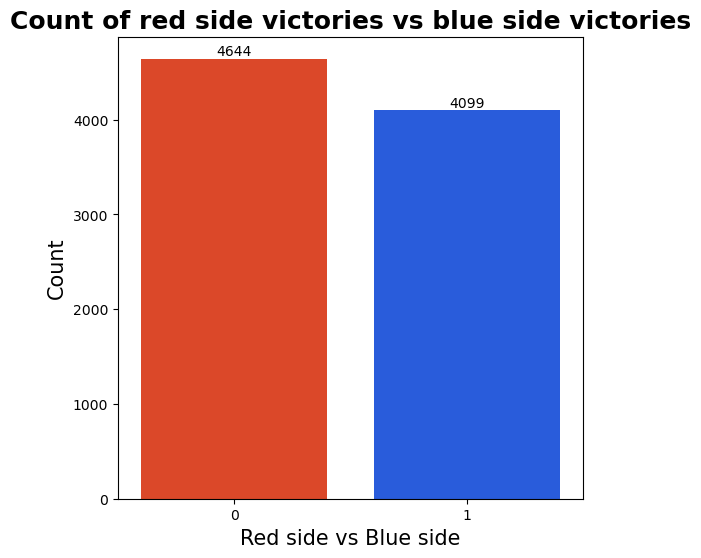

In [11]:
#check to see if there's any data imbalance present in the dataset. we can see that there are 4644 instances of 0 (red side won) and 4099 instances of 1 (blue side won)
#overall, the data seems relatively balanced. if there was a huge class imbalance we would consider resampling methods

figure, axes = plt.subplots(figsize=(6,6))
ax=sns.countplot(data=df, x= 'blue_side_won', ax = axes, palette=['#f8350c',"#0c50f8"])
ax.bar_label(ax.containers[0])
ax.set_title('Count of red side victories vs blue side victories', fontsize=18, fontweight='bold')
ax.set_xlabel('Red side vs Blue side', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
#ax.legend(labels=['Blue side victories', 'Red side victories'], loc=2, bbox_to_anchor=(1, 1))

In [12]:
df

,total_blue_side_minions,total_blue_side_gold_earned,total_blue_side_wards_placed,total_blue_side_kills,total_blue_side_deaths,total_blue_side_dragons_killed,total_blue_side_riftHeralds_killed,total_towers_destroyed_by_blue,total_inhibitors_destroyed_by_blue,total_red_side_minions,total_red_side_gold_earned,total_red_side_kills,total_red_side_deaths,total_red_side_wards_placed,total_red_side_dragons_killed,total_red_side_riftHeralds_killed,total_towers_destroyed_by_red,total_inhibitors_destroyed_by_red,blue_side_won
0,482,36403,79,15,16,2,0,1,0,537,37878,16,15,38,1,1,3,0,0
1,452,45450,41,31,10,2,1,8,0,400,32273,10,31,136,0,0,3,2,1
2,467,38334,39,22,12,2,1,1,0,455,35596,12,22,34,0,0,5,0,1
3,425,32749,67,12,16,0,1,0,0,466,36281,16,12,47,3,0,3,0,0
4,472,36853,47,17,8,2,1,1,0,511,32248,8,17,36,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,409,35557,37,14,22,0,1,0,0,448,39565,22,14,37,3,0,4,0,0
8739,458,37379,51,17,9,2,0,4,0,488,32714,9,17,89,0,1,1,0,1
8740,499,37200,57,14,20,0,0,2,0,523,37772,20,14,152,2,0,3,0,0
8741,425,30780,41,9,18,0,1,0,0,512,38267,18,9,73,3,0,4,0,0


In [13]:
df.min(axis=0)

total_blue_side_minions                 294
total_blue_side_gold_earned           24851
total_blue_side_wards_placed             16
total_blue_side_kills                     0
total_blue_side_deaths                    1
total_blue_side_dragons_killed            0
total_blue_side_riftHeralds_killed        0
total_towers_destroyed_by_blue            0
total_inhibitors_destroyed_by_blue        0
total_red_side_minions                  323
total_red_side_gold_earned            24931
total_red_side_kills                      1
total_red_side_deaths                     0
total_red_side_wards_placed              17
total_red_side_dragons_killed             0
total_red_side_riftHeralds_killed         0
total_towers_destroyed_by_red             0
total_inhibitors_destroyed_by_red         0
blue_side_won                             0
dtype: int64

# Make new features/columns with differences between each teams

In [14]:
df['wards_placed_diff'] = df['total_blue_side_wards_placed'] - df['total_red_side_wards_placed']
df['total_minions_diff'] = df['total_blue_side_minions'] - df['total_red_side_minions']
df['gold_earned_diff'] = df['total_blue_side_gold_earned'] - df['total_red_side_gold_earned']
df['towers_destroyed_diff'] = df['total_towers_destroyed_by_blue'] - df['total_towers_destroyed_by_red']
df['inhibitors_destroyed_diff'] = df['total_inhibitors_destroyed_by_blue'] - df['total_inhibitors_destroyed_by_red']
df['kills_diff'] = df['total_blue_side_kills'] - df['total_red_side_kills']



# EDA

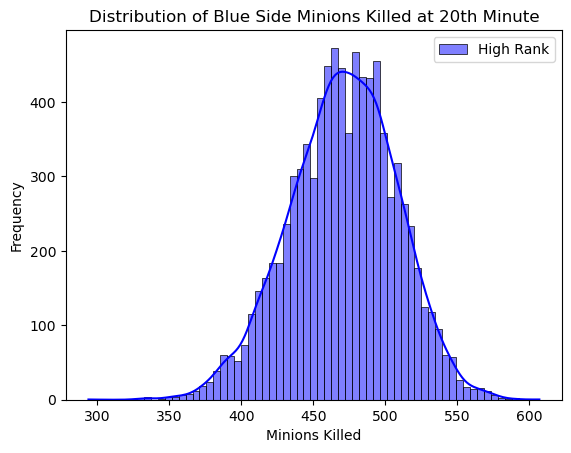

In [15]:
sns.histplot(df['total_blue_side_minions'], color='blue', label='High Rank', kde=True)
plt.title('Distribution of Blue Side Minions Killed at 20th Minute')
plt.xlabel('Minions Killed')
plt.ylabel('Frequency')
plt.legend()
plt.show()

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


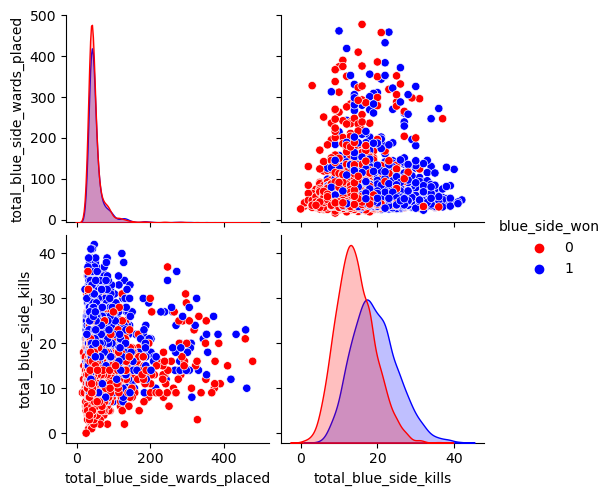

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


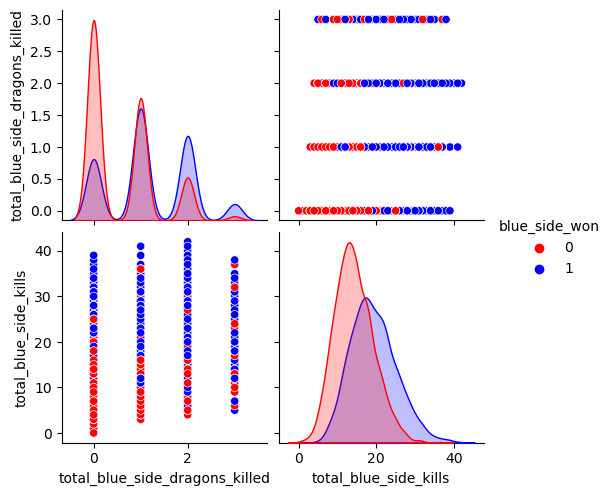

In [16]:
sns.pairplot(data=df, vars=('total_blue_side_wards_placed', 'total_blue_side_kills'), hue='blue_side_won', palette=['r','b'])
plt.show()
sns.pairplot(data=df, vars=('total_blue_side_dragons_killed','total_blue_side_kills'), hue='blue_side_won', palette=['r','b'])
plt.show()


c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


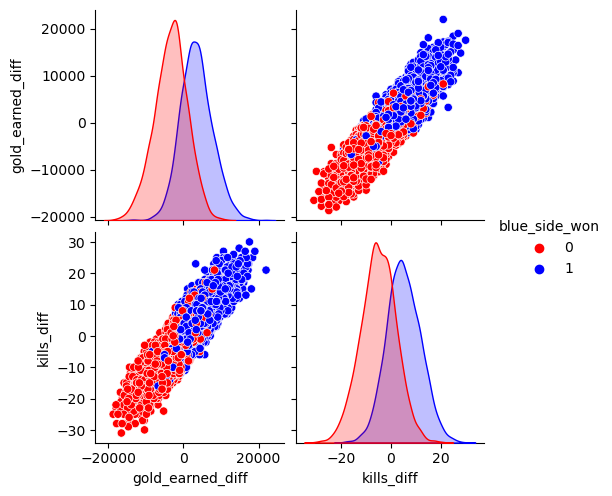

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


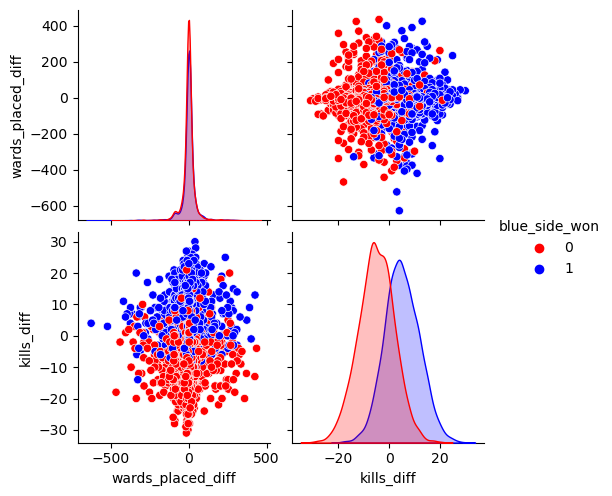

c:\Users\madna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


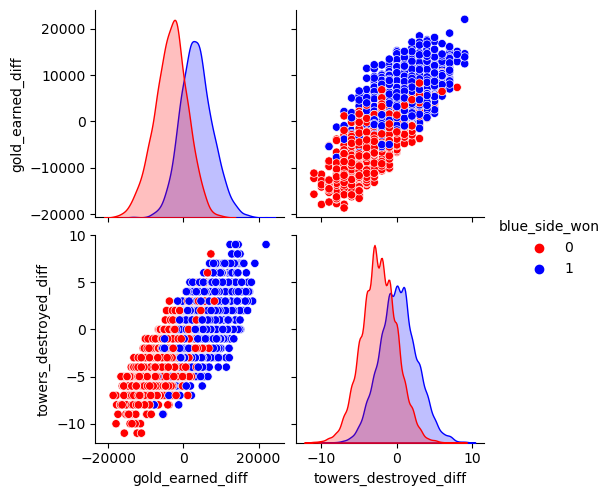

In [17]:
sns.pairplot(data=df, vars=('gold_earned_diff', 'kills_diff'), hue='blue_side_won', palette=['r','b'])  #.figure.suptitle('test') to add title
plt.show()
sns.pairplot(data=df, vars=('wards_placed_diff', 'kills_diff'), hue='blue_side_won', palette=['r','b'])
plt.show()
sns.pairplot(data=df, vars=('gold_earned_diff', 'towers_destroyed_diff'), hue='blue_side_won', palette=['r','b'])
plt.show()

# Data Pre-processing

In [18]:
#Split the dataset into X and y
X = df.drop(columns=['blue_side_won'], axis=1)
y = df['blue_side_won']

In [19]:
#use standardscaler() to scale the data

scaler = StandardScaler()

#split the dataset into testing and training sets with 70% being allocated to training and 30% allocated to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 

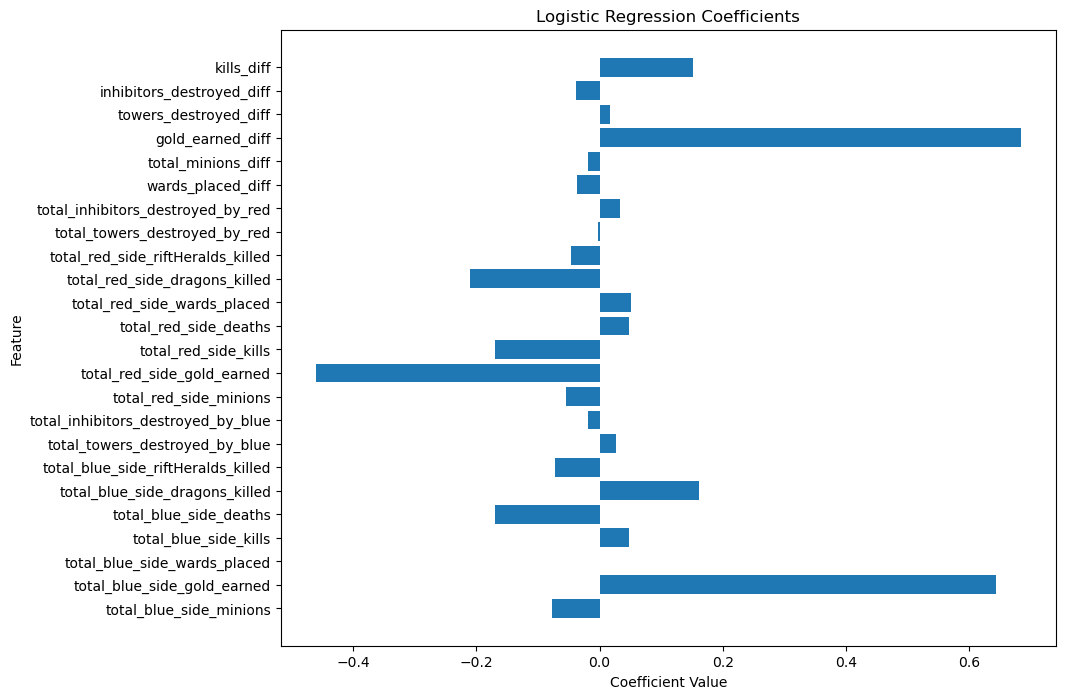

In [20]:
#fitting the logistic regression model on our data and training it
model = LogisticRegression(penalty='l2')
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
logistic_reg_acc = accuracy_score(y_test, y_pred)
coefficients = model.coef_[0]
feature_names = X.columns

confusion_mat= confusion_matrix(y_test, y_pred)

#plotting the coeffecients of logsitic regression MAKE SURE TO TALK ABOUT THIS IN THE REPORT
plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

In [50]:
scaled_X_train_df=pd.DataFrame(scaled_X_train, columns=X.columns)
scaled_X_test_df = pd.DataFrame(scaled_X_test, columns=X.columns)

In [64]:
def get_model_results(model_class, param_grid, random_state=42):
    
    '''args: model_class = the algorithm we wish to use, param_grid= the parameters we will be testing using gridsearch
        outputs the accuracy of the model, along with the best hyperparameters, best cross validation score, classiftion report, confusion matrix and the ROC curve graph and also the SHAP summary plot
        
    '''


    model = clone(model_class)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    gridsearch = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    gridsearch.fit(scaled_X_train_df, y_train)

    best_model = clone(model_class).set_params(**gridsearch.best_params_)
    best_model.fit(scaled_X_train_df, y_train)
    y_pred = best_model.predict(scaled_X_test_df)
    confusion_mat = confusion_matrix(y_test, y_pred)
    model_accuracy = accuracy_score(y_test, y_pred)

    y_pred_probability = best_model.predict_proba(scaled_X_test_df)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    auc = roc_auc_score(y_test, y_pred_probability)
    

    print('Accuracy of the model: {:.4f}'.format(model_accuracy))
    print('The best hyperparameters of this model: ', gridsearch.best_params_)
    print('The best cross validation score of this model: {:.4f} '.format(gridsearch.best_score_))

    print('Classification report of the model:')
    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_mat, annot=True, fmt='g',
            xticklabels=['Blue wins','Red wins'],
            yticklabels=['Blue wins','Red wins'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for the testing set')
    plt.legend(loc="lower right")
    plt.show()
    
    
    #shap
    explainer = shap.KernelExplainer(best_model.predict, shap.sample(scaled_X_train_df, 100))
    shap_values = explainer.shap_values(scaled_X_test_df, nsamples=100)

    # Visualize SHAP values
    shap.summary_plot(shap_values, scaled_X_test_df)

    return best_model


Accuracy of the model: 0.7865
The best hyperparameters of this model:  {'C': 10, 'kernel': 'linear'}
The best cross validation score of this model: 0.7920 
Classification report of the model:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1380
           1       0.78      0.77      0.77      1243

    accuracy                           0.79      2623
   macro avg       0.79      0.79      0.79      2623
weighted avg       0.79      0.79      0.79      2623



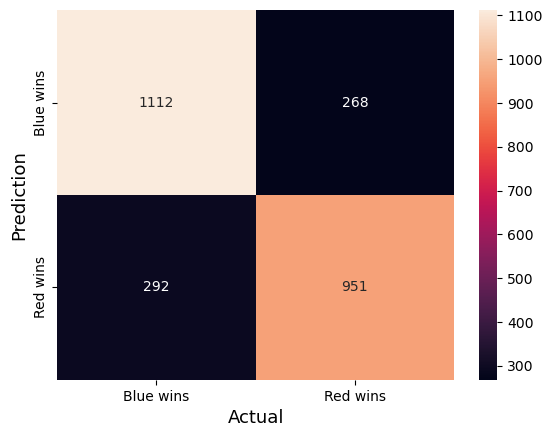

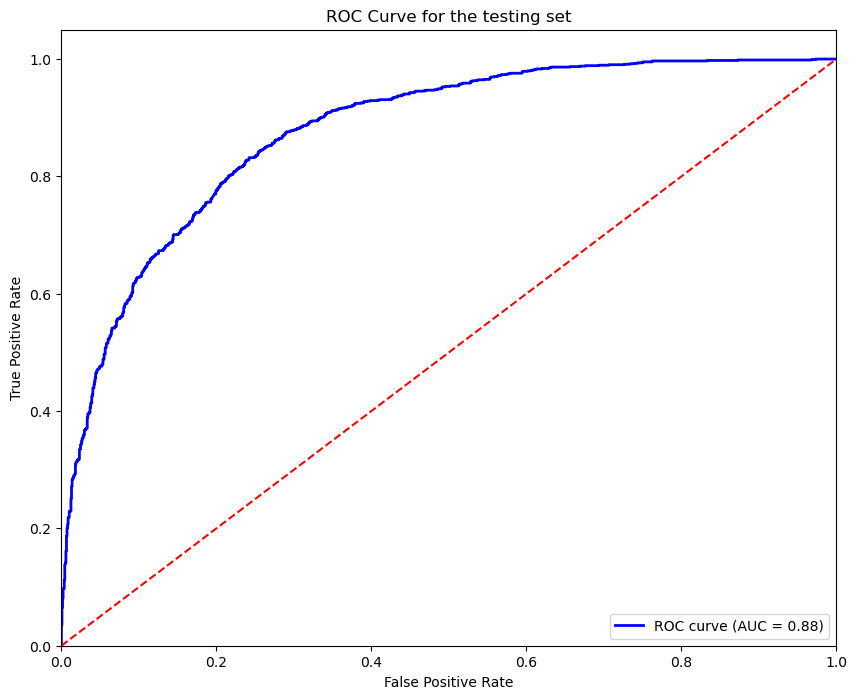

  0%|          | 0/2623 [00:00<?, ?it/s]

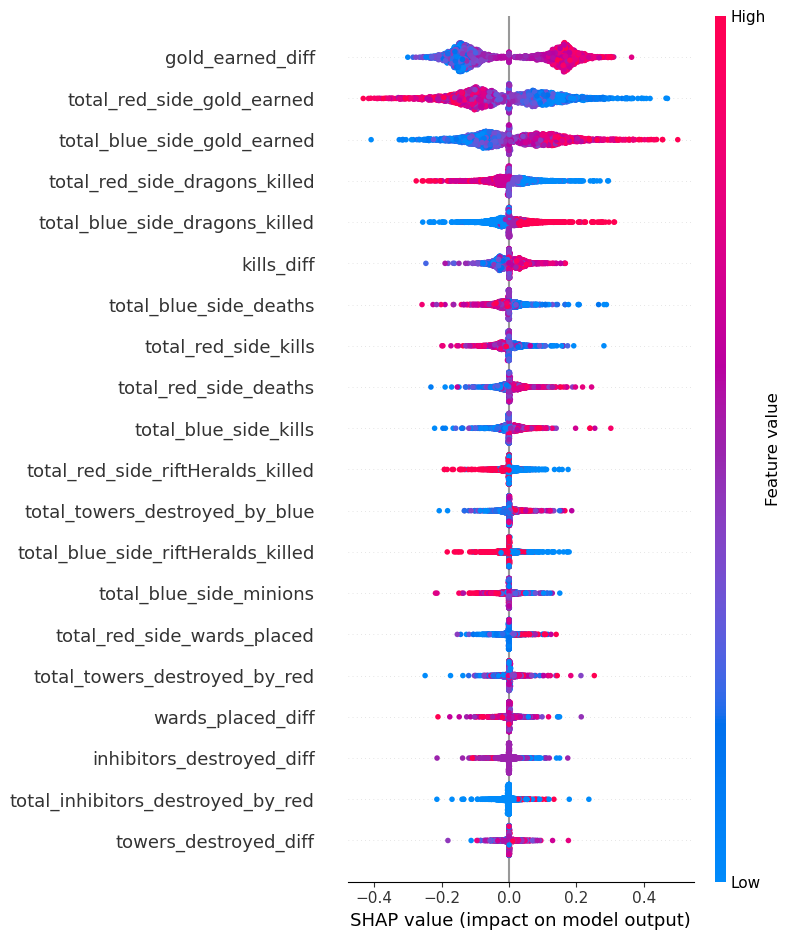

SVC(C=10, kernel='linear', probability=True)

In [65]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
get_model_results(SVC(probability=True), param_grid_svc)



In [61]:
'''best_model = get_model_results(KNeighborsClassifier(), param_grid = {
    'n_neighbors':np.arange(1,33),
    'weights':['uniform', 'distance'],
    'p':[1,2]
})'''


"best_model = get_model_results(KNeighborsClassifier(), param_grid = {\n    'n_neighbors':np.arange(1,33),\n    'weights':['uniform', 'distance'],\n    'p':[1,2]\n})"

c:\Users\madna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\madna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\madna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\madna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

  0%|          | 0/2623 [00:00<?, ?it/s]

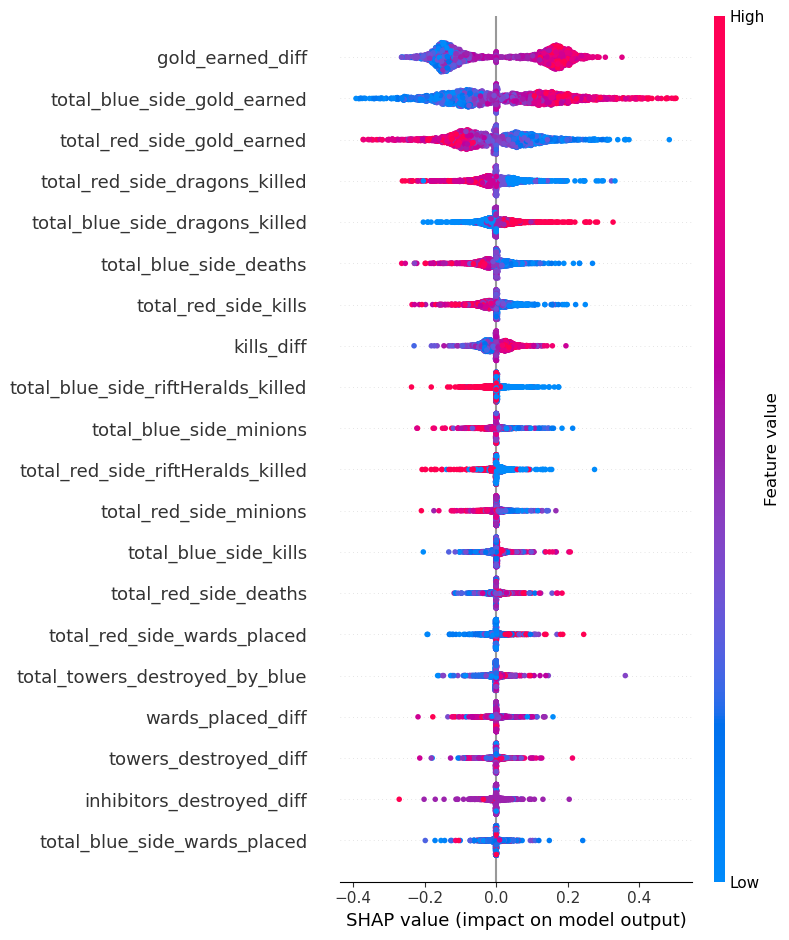

Accuracy of the model: 0.7896
The best hyperparameters of this model:  {'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
The best cross validation score of this model: 0.7905 
Classification report of the model:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1380
           1       0.78      0.77      0.78      1243

    accuracy                           0.79      2623
   macro avg       0.79      0.79      0.79      2623
weighted avg       0.79      0.79      0.79      2623



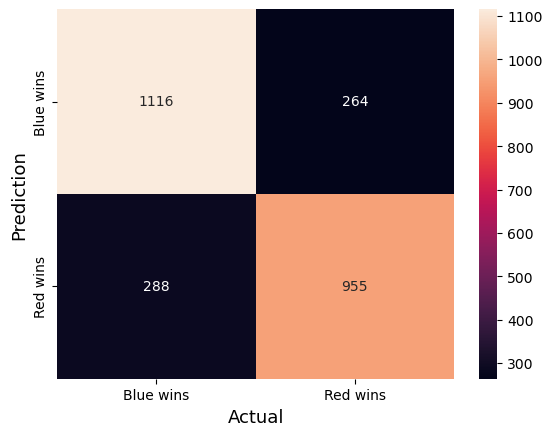

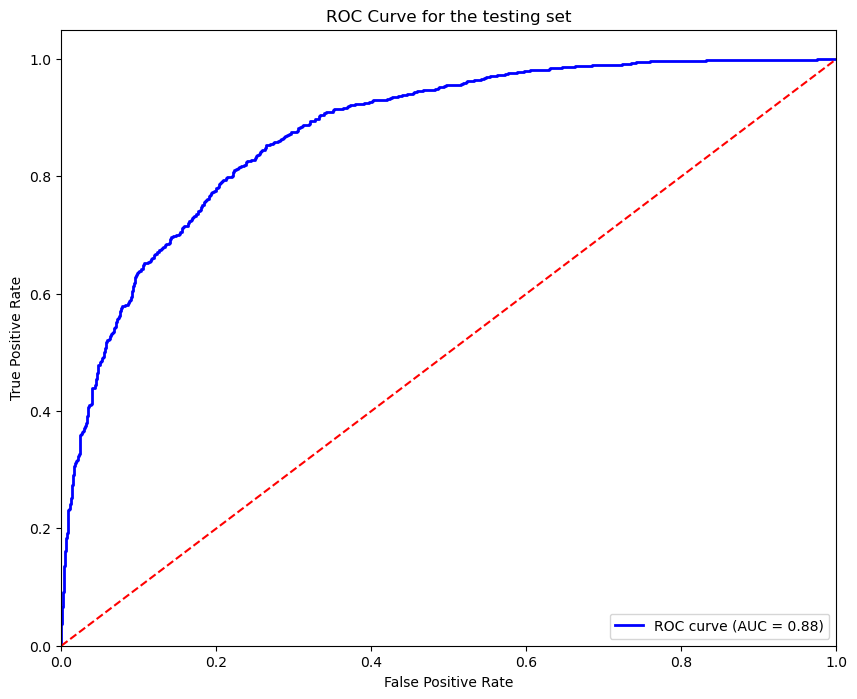

LogisticRegression(random_state=42)

In [60]:
get_model_results(LogisticRegression(random_state=42), param_grid={
    'penalty':['l2', 'l1'],
    'solver':['lbfgs', 'liblinear'],
    'max_iter':[100, 200, 300, 400]
})

In [25]:
'''param_grid ={
    'n_estimators':[100, 200, 300, 400],
    'criterion': ['gini','entropy','log_loss'],
    'min_samples_split':np.arange(1,11),
    'max_features':[None, 'sqrt', 'log2']
}

get_model_results(RandomForestClassifier(random_state=42), param_grid)'''

"param_grid ={\n    'n_estimators':[100, 200, 300, 400],\n    'criterion': ['gini','entropy','log_loss'],\n    'min_samples_split':np.arange(1,11),\n    'max_features':[None, 'sqrt', 'log2']\n}\n\nget_model_results(RandomForestClassifier(random_state=42), param_grid)"

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [27]:
X_scaled = scaler.fit_transform(X)

nn_model = Sequential([
    Input(shape=(scaled_X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = nn_model.fit(scaled_X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

test_loss, test_accuracy = nn_model.evaluate(scaled_X_train, y_train)
print('Test accuracy:', test_accuracy)

y_pred = (nn_model.predict(scaled_X_test) > 0.5).astype("int32")
print("Accuracy score:", accuracy_score(y_test, y_pred))

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6174 - loss: 0.6401 - val_accuracy: 0.7786 - val_loss: 0.4585
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4715 - val_accuracy: 0.7900 - val_loss: 0.4472
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7819 - loss: 0.4710 - val_accuracy: 0.7851 - val_loss: 0.4464
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.4463 - val_accuracy: 0.7843 - val_loss: 0.4426
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4568 - val_accuracy: 0.7819 - val_loss: 0.4461
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4467 - val_accuracy: 0.7876 - val_loss: 0.4459
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.4428 - val_accuracy: 0.7851 - val_loss: 0.4442
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4429 - val_accuracy: 0.7843 - val_loss:

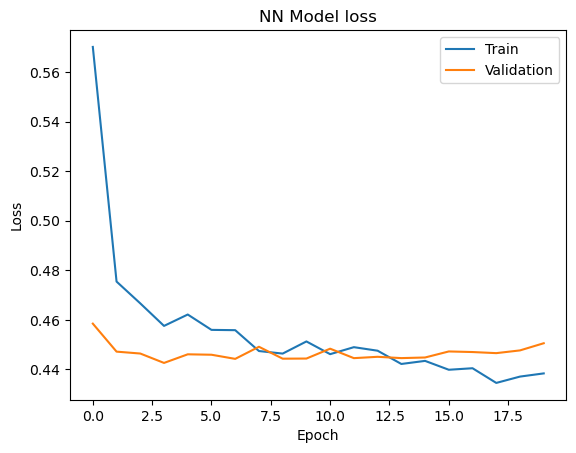

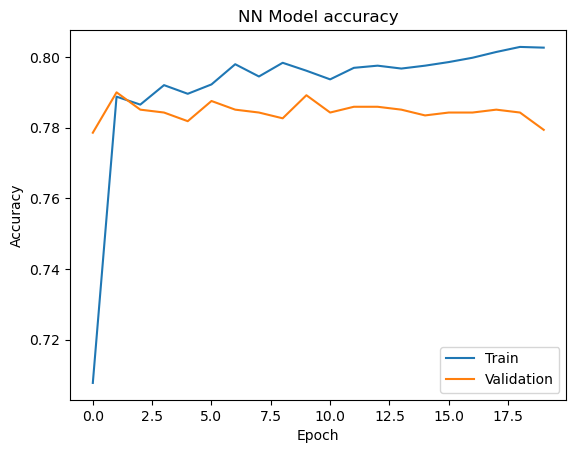

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('NN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('NN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()